In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-10-22 17:51:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.001s  

2020-10-22 17:51:10 (38.9 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [8]:
df=pd.read_csv("cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.shape

(699, 11)

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).



In [7]:
df.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [15]:
df=df.drop_duplicates()          #drop duplicate values
df.reset_index(drop=True,inplace=True)
df.shape

(691, 11)

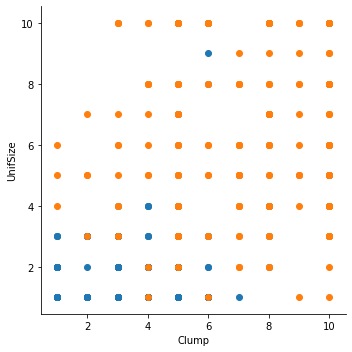

In [61]:
p=sns.FacetGrid(df,hue="Class",height=5)
p.map(plt.scatter,"Clump","UnifSize")

In [29]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [46]:
df = df[pd.to_numeric(df['BareNuc']).notnull()]
df['BareNuc'] = df['BareNuc'].astype("int")
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [48]:
for i in df.columns.values:
    print(i)
    print(df[i].isnull().value_counts(),end="\n\n")

ID
False    675
Name: ID, dtype: int64

Clump
False    675
Name: Clump, dtype: int64

UnifSize
False    675
Name: UnifSize, dtype: int64

UnifShape
False    675
Name: UnifShape, dtype: int64

MargAdh
False    675
Name: MargAdh, dtype: int64

SingEpiSize
False    675
Name: SingEpiSize, dtype: int64

BareNuc
False    675
Name: BareNuc, dtype: int64

BlandChrom
False    675
Name: BlandChrom, dtype: int64

NormNucl
False    675
Name: NormNucl, dtype: int64

Mit
False    675
Name: Mit, dtype: int64

Class
False    675
Name: Class, dtype: int64



## data selection

In [52]:
x=df.drop(["ID","Class"],axis=1)
y=df["Class"]


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=42)

# Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [82]:
from sklearn import svm
clf=svm.SVC(kernel="rbf")
clf.fit(x_train,y_train)

SVC()

In [83]:
ypred=clf.predict(x_test)   # y prediction 


              precision    recall  f1-score   support

           2       0.94      0.99      0.96        80
           4       0.98      0.91      0.94        55

    accuracy                           0.96       135
   macro avg       0.96      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



<Figure size 720x720 with 0 Axes>

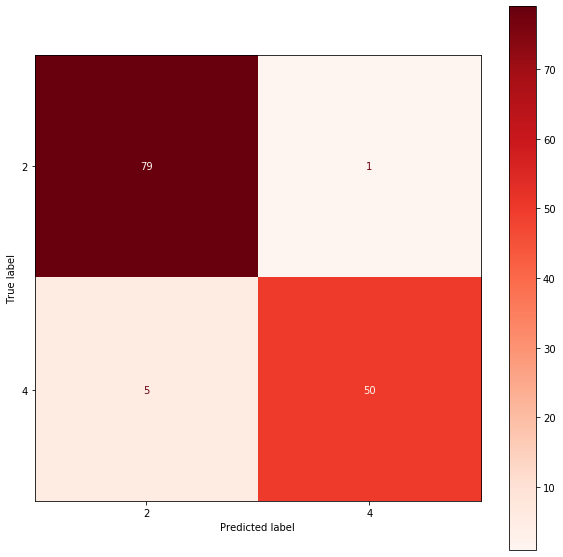

In [88]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
print (classification_report(y_test, ypred))
plt.figure(figsize=(10,10))
plot_confusion_matrix(clf,x_test,y_test,cmap=plt.cm.Reds)
plt.gcf().set_size_inches(10,10) 


In [90]:
from sklearn.metrics import f1_score
f1_score(y_test,ypred,average="weighted")

0.9552589865521297